In [1463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn import svm, grid_search, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score, classification_report

# Cleaning

In [1464]:
data=pd.read_csv('imdb_processed.csv')

In [1465]:
#data.head()

In [1466]:
# change le nom de index
del  data['Unnamed: 0']

In [1467]:
data['year'] = data['year'].astype(int)


In [1468]:
data.describe()

,year,rating,vote,runtime
count,8451.000000,8135.000000,8.135000e+03,6798.000000
mean,1991.626080,6.680000,1.873295e+04,99.984113
std,15.129001,1.281778,8.957999e+04,65.277725
min,1905.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.075000e+02,82.000000
50%,1998.000000,6.900000,1.531000e+03,95.000000
75%,2002.000000,7.600000,6.897500e+03,110.000000
max,2005.000000,9.600000,2.462087e+06,1620.000000


In [1469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8451 non-null   object 
 1   year      8451 non-null   int64  
 2   kind      8451 non-null   object 
 3   genre     8384 non-null   object 
 4   rating    8135 non-null   float64
 5   vote      8135 non-null   float64
 6   country   8152 non-null   object 
 7   language  8052 non-null   object 
 8   cast      8280 non-null   object 
 9   director  7140 non-null   object 
 10  composer  5722 non-null   object 
 11  writer    7204 non-null   object 
 12  runtime   6798 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 858.4+ KB


In [1470]:
# we will change the type of data for :
# year 

In [1471]:
data.isna().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [1472]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

genre null rate: 0.79%
rating null rate: 3.74%
vote null rate: 3.74%
country null rate: 3.54%
language null rate: 4.72%
cast null rate: 2.02%
director null rate: 15.51%
composer null rate: 32.29%
writer null rate: 14.76%
runtime null rate: 19.56%


In [1473]:
#data genre splitting
data['genre'] = data['genre'].str.strip('[]')
genre = data.genre.str.split(',').apply(pd.Series)
genre = genre.drop(columns= [3,4,5,6,7,8,9,10])
genre=genre.rename(columns={0: "genre1", 1: "genre2"})

In [1474]:
data = data.join(genre)
data = data.drop(columns='genre')

In [1475]:
#country
data['country'] = data['country'].str.strip('[]')
country = data.country.str.split(',').apply(pd.Series)
country = country.drop(columns= [2,3,4,5,6,7,8,9,10])
country=country.rename(columns={0: "country1", 1: "country2"})

In [1476]:
data = data.join(country)
data = data.drop(columns='country')

In [1477]:
#language
data['language'] = data['language'].str.strip('[]')
language = data.language.str.split(',').apply(pd.Series)
language = language.drop(columns= [2,3,4,5,6,7,8,9,10])
language=language.rename(columns={0: "language1", 1: "language2"})

In [1478]:
data = data.join(language)
data = data.drop(columns='language')

In [1479]:
#cast
data['cast'] = data['cast'].str.strip('[]')
cast = data.cast.str.split(',').apply(pd.Series)
cast= cast[[0,1]]
cast=cast.rename(columns={0: "cast1", 1: "cast2"})


In [1480]:
data = data.join(cast)
data = data.drop(columns='cast')

In [1481]:
#director
data['director'] = data['director'].str.strip('[]')
director = data.director.str.split(',').apply(pd.Series)
director = director.drop(columns= [2])
director=director.rename(columns={0: "director1", 1: "director2"})

In [1482]:
data = data.join(director)
data = data.drop(columns='director')

In [1483]:
#writer
data['writer'] = data['writer'].str.strip('[]')
writer = data.writer.str.split(',').apply(pd.Series)
writer = writer.drop(columns= [2])
writer=writer.rename(columns={0: "writer1", 1: "writer2"})

In [1484]:
data = data.join(writer)
data = data.drop(columns='writer')

In [1485]:
data=data.rename(columns={2: "genre3"})

In [1486]:
#composer
data['composer'] = data['composer'].str.strip('[]')
composer = data.composer.str.split(',').apply(pd.Series)
composer = composer.drop(columns= [2,3,4,5,6,7,8,9])
composer=composer.rename(columns={0: "composer1", 1: "composer2"})

In [1487]:
data = data.join(composer)
data = data.drop(columns='composer')

In [1488]:
#after checking the results we consider to delete 
#language2     6731
#director2     7692
#country2       6811
#composer2      7433
#genre3          4594
#writer2       3338
#composer1     2729

data = data.drop(columns=['genre2','composer2','language2','director2','country2','composer1','composer2','genre3','writer2','cast2'])


In [1489]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
country1      299
language1     399
cast1         171
director1    1311
writer1      1247
dtype: int64

In [1490]:
data['director1']=np.where(data['director1'].isna()==True,'None',data['director1'])

In [1491]:
data['writer1']=np.where(data['writer1'].isna()==True,'None',data['writer1'])

In [1492]:
data['genre1']=np.where(data['genre1'].isna()==True,'None',data['genre1'])

In [1493]:
data['country1']=np.where(data['country1'].isna()==True,'None',data['country1'])

In [1494]:
data['language1']=np.where(data['language1'].isna()==True,'None',data['language1'])

In [1495]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [1496]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [1497]:
data['genre1'] = data['genre1'].str.strip("''").astype(object)
data['country1'] = data['country1'].str.strip("''").astype(object)
data['language1'] = data['language1'].str.strip("''").astype(object)
data['cast1'] = data['cast1'].str.strip("''").astype(object)
data['writer1'] = data['writer1'].str.strip("''").astype(object)
data['director1'] = data['director1'].str.strip("''").astype(object)


In [1498]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1          0
country1        0
language1       0
cast1           0
director1       0
writer1         0
dtype: int64

In [1499]:
# calculate medians for each moovie kind
median_values = data[['runtime','kind']].groupby(['kind']).agg("mean")
median_values

,runtime
kind,
episode,98.230947
movie,99.231426
tv mini series,99.367150
tv movie,103.788491
tv series,102.680154
tv short,70.875000
video game,108.894737
video movie,99.995479


In [1500]:
# impute missing values for rating, vote, runtime columns with medians
kinds = ['episode', 'movie', 'tv mini series', 'tv movie', 'tv series', 'tv short', 'video game', 'video movie']
col_impute = ['runtime']
for kind in kinds:
    for col in col_impute:
        for i in range(len(data)):
            if math.isnan(data[col][i])==True:
                if data['kind'][i] == kind:
                    data[col][i]= median_values.at[kind, col]

<ipython-input-1500-9072499d0d53>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]= median_values.at[kind, col]


In [1501]:
data = data.dropna(subset=['rating'])

# EDA

In [1502]:
data=data.rename(columns={'genre1': "Genre", 'country1': "Country",'language1': "Language",'cast1': "Cast",'director1':"Director",'writer1':"Writer",'composer1':"Composer"})


In [1503]:
data['rating']=round(data['rating']).astype(int)


### Graphs

In [1504]:
years = data['year'].unique()
df2 = pd.DataFrame(columns=['Genre1', 'kind'])
for i in years:
    a =year[year['year']==i]
    a = a[a['kind']==a.kind.max()]
    df2 = df2.append(a)
df2['year'] = df2['year'].astype(int)
df2.sort_values(by='year', inplace=True)
g=sns.catplot(x='year', y='kind', hue="genre1", data=df2, s=20)
plt.xticks(rotation=90)
plt.title('Most popular genre per year',{'fontsize': 20})
g.fig.set_size_inches(23,15)

IndexError: invalid index to scalar variable.

In [1505]:
year=pd.DataFrame(columns=['year'])
year['year']=data['year']
year['Genre']=data['Genre']
year

,year,Genre
0,2003,Documentary
1,1994,Family
2,1992,Action
3,2004,Documentary
4,1991,Comedy
...,...,...
8446,1969,Adventure
8447,2005,Documentary
8448,2001,Sci-Fi
8449,2003,Drama


In [1506]:
most_genress = pd.DataFrame()
df1 = data[['year', 'title', 'Genre']]
# groupby table
group_tab = df1.groupby(['year', 'Genre'], as_index=False)[['Genre','title']].agg({'title':'count'})
# new df with max count by genre and countries
years = group_tab['year'].unique()
for year in years:
    d = group_tab[(group_tab['year'] == year)]
    d = d[(d['title'] == d['title'].max())]
    most_genress = pd.concat([most_genress, d], ignore_index=True)
most_genress

,year,Genre,title
0,1914,Action,1
1,1916,Drama,1
2,1918,Comedy,3
3,1919,Drama,1
4,1922,Documentary,2
...,...,...,...
108,2001,Drama,113
109,2002,Documentary,138
110,2003,Documentary,149
111,2004,Documentary,177


In [1507]:

most_genres = pd.DataFrame()
df1 = data[['Country', 'title', 'Genre']]
# groupby table
group_tab = df1.groupby(['Country', 'Genre'], as_index=False)[['Genre','title']].agg({'title':'count'})
# new df with max count by genre and countries
countries = group_tab['Country'].unique()
for country in countries:
    d = group_tab[(group_tab['Country'] == country)]
    d = d[(d['title'] == d['title'].max())]
    most_genres = pd.concat([most_genres, d], ignore_index=True)
most_genres

,Country,Genre,title
0,Afghanistan,Drama,1
1,Argentina,Drama,6
2,Armenia,Comedy,1
3,Aruba,Action,1
4,Australia,Comedy,31
...,...,...,...
74,Vietnam,Drama,2
75,West Germany,Drama,23
76,Yugoslavia,Biography,1
77,Yugoslavia,Comedy,1


# Encoding

In [1508]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Object_list = data.select_dtypes(include = "object").columns
for col in ['title','Genre','kind','Country','Language','Cast','Director','Writer']:
    data[col] = le.fit_transform(data[col].astype(str))

In [1509]:
#file with encoding
data.to_csv("file_encoding.csv")

# GaussianNB

## Feature Selection

In [1510]:
x = data.drop(['rating','title','Writer'], axis = 1)
y = data['rating']


In [1511]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [1512]:
y_train.value_counts()

7     2033
8     1652
6     1533
5      579
4      329
9      236
3      108
2       37
10       1
Name: rating, dtype: int64

In [1513]:
percen=((y_train.value_counts().index*y_train.value_counts())/43388)*100

In [1514]:
SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)
s=SFM.fit(x_train, y_train)

In [1515]:
n_features = s.transform(x_train).shape[1]
n_features


5

In [1516]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['year', 'vote', 'runtime', 'Cast', 'Director'], dtype='object')

### GNB implementation

In [1517]:

gnb = GaussianNB(var_smoothing=0.4)
#why 0.4 - var_smoothing=0.4 is defined below with hyperparameters tunning
y_pred = gnb.fit(x_train, y_train).predict(x_test)
acc_rfc = gnb.score(x_test, y_test)
print('The accuracy of the method is:', acc_rfc * 100, '%')


The accuracy of the method is: 32.39090350338045 %


In [1518]:
def best_parameters(X_train, X_test, y_train, y_test):
    lista={}
    i=0
    while(i<=100):
        gnb = GaussianNB(var_smoothing=i)
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        #print("Number of mislabeled points out of a total %d points : %d"
        a=X_test.shape[0]
        b=(y_test != y_pred).sum()
        c=b/a
        lista[i]=1-c
        i+=0.1
    return lista


In [1519]:
best_parameters(x_train, x_test, y_train, y_test)

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


{0: 0.0,
 0.1: 0.32206515058389673,
 0.2: 0.32329440688383526,
 0.30000000000000004: 0.3245236631837738,
 0.4: 0.3239090350338045,
 0.5: 0.32206515058389673,
 0.6: 0.322679778733866,
 0.7: 0.32329440688383526,
 0.7999999999999999: 0.3208358942839582,
 0.8999999999999999: 0.32145052243392747,
 0.9999999999999999: 0.32329440688383526,
 1.0999999999999999: 0.32206515058389673,
 1.2: 0.32206515058389673,
 1.3: 0.3208358942839582,
 1.4000000000000001: 0.32145052243392747,
 1.5000000000000002: 0.32145052243392747,
 1.6000000000000003: 0.32145052243392747,
 1.7000000000000004: 0.32206515058389673,
 1.8000000000000005: 0.32206515058389673,
 1.9000000000000006: 0.322679778733866,
 2.0000000000000004: 0.322679778733866,
 2.1000000000000005: 0.32206515058389673,
 2.2000000000000006: 0.32206515058389673,
 2.3000000000000007: 0.32206515058389673,
 2.400000000000001: 0.32145052243392747,
 2.500000000000001: 0.3208358942839582,
 2.600000000000001: 0.3208358942839582,
 2.700000000000001: 0.32083589428

In [1520]:
# Hyper peremeter
grid_search = GridSearchCV(GaussianNB(),
                           {
                            'var_smoothing':([0,0.4,0.2,0.3,0.1,0.5,0.6,0.7,0.8,0.9,1])
                            },cv=4, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 11 candidates, totalling 44 fits


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0, 0.4, 0.2, 0.3, 0.1, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1]},
             scoring='accuracy', verbose=1)

In [1521]:
grid_search.best_params_

{'var_smoothing': 0.7}

In [1524]:
grid_search.best_score_

0.3149969268592502

# Model Evaluation

In [1525]:
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred

<ipython-input-1525-78482d6c90e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_initial"]=y_test
<ipython-input-1525-78482d6c90e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_pred"]=y_pred


In [1526]:
from sklearn import metrics
metrics.confusion_matrix(x_test["y_initial"],x_test["y_pred"])

array([[  0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0,   0,   0,   0,  68,   0,   0],
       [  0,   0,   0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,   0, 385,   3,   0],
       [  0,   0,   0,   0,   0, 499,  13,   2],
       [  0,   0,   0,   0,   0, 409,  24,   8],
       [  0,   0,   0,   0,   0,  53,   0,   4]])

In [1527]:
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

y_pred,7,8,9
y_initial,,,
2,8,0,0
3,25,0,0
4,68,0,0
5,126,0,0
6,385,3,0
7,499,13,2
8,409,24,8
9,53,0,4


##### Accuracy Score

In [1528]:
print(metrics.accuracy_score(x_test["y_initial"],x_test["y_pred"]))

0.3239090350338045


##### Precision Score

In [1529]:
print(metrics.precision_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.2728586494245543


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Recall Score

In [1530]:
print(metrics.recall_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.3239090350338045


##### f1 Score

In [1531]:
from sklearn.metrics import f1_score
print(metrics.f1_score(x_test["y_initial"],x_test["y_pred"],average='weighted'))

0.18206810930876596


##### ROC_AUC Score / not used for multiclasses

In [1535]:
#ROC_AUC score
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"],multi_class='ovo',average='weighted'))

AxisError: axis 1 is out of bounds for array of dimension 1

In [1536]:
fpr, tpr, thresholds = metrics.roc_curve(x_test["y_initial"],x_test["y_pred"])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

ValueError: multiclass format is not supported

# To evaluate AUC

In order to create a model that allows to calculate AUC. We implemented a different score [0-5][5-10] and we labeled it as 0 and 1

In [1537]:
data2=data

In [1538]:
data2['scoring']= pd.cut(data2.rating, bins=[0,5,10], labels=[0,1]) 

In [1539]:
data2['scoring'].value_counts()

1    6855
0    1280
Name: scoring, dtype: int64

In [1540]:
x = data2.drop(['rating','scoring','title','Writer'], axis = 1)
y = data2['scoring']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [1541]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
acc_rfc = gnb.score(x_test, y_test)
print('The accuracy of the method is:', acc_rfc * 100, '%')

The accuracy of the method is: 49.416103257529194 %


In [1542]:
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred

<ipython-input-1542-78482d6c90e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_initial"]=y_test
<ipython-input-1542-78482d6c90e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_pred"]=y_pred


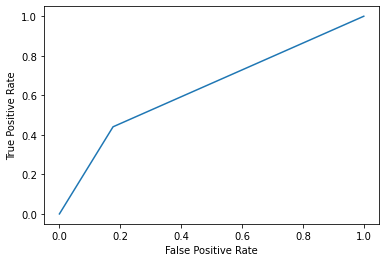

In [1543]:
fpr, tpr, thresholds = metrics.roc_curve(x_test["y_initial"],x_test["y_pred"])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [1544]:
from sklearn.metrics import confusion_matrix
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 


The classification report for GaussianNB is:
              precision    recall  f1-score   support

           0       0.19      0.82      0.31       227
           1       0.94      0.44      0.60      1400

    accuracy                           0.49      1627
   macro avg       0.57      0.63      0.46      1627
weighted avg       0.83      0.49      0.56      1627



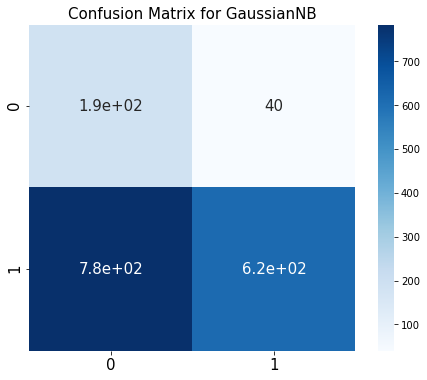

In [1545]:
generate_results(gnb, y_pred, 'GaussianNB')

#### ROC_AUC Score

In [1546]:
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"]))

0.6322514159848962


# Quadratic Discriminant Analysis

In [1586]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [1596]:
data3 = data[data.rating != 10]
x = data3.drop(['rating','scoring'], axis =1)
y = data3['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [1604]:
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)
s=SFM.fit(x, y)
n_features = s.transform(x).shape[1]

n_features

7

In [1605]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['title', 'year', 'vote', 'runtime', 'Cast', 'Director', 'Writer'], dtype='object')

In [1606]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [1607]:
clf = QuadraticDiscriminantAnalysis()
clf

QuadraticDiscriminantAnalysis()

In [1608]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)


#### Accuracy Score

In [1609]:
acc_clf = clf.score(x_test, y_test)
print('The accuracy of the QuadraticDiscriminantAnalysis is:', acc_clf* 100, '%')

The accuracy of the QuadraticDiscriminantAnalysis is: 22.92562999385372 %


#### F1 Score

In [1610]:
print(f"F1 Score of the QuadraticDiscriminantAnalysis is: {f1_score(y_test, y_predict, average='macro') *100}")

F1 Score of the QuadraticDiscriminantAnalysis is: 16.861012916363983


#### Recall Score

In [1611]:
print(f"Recall Score of the QuadraticDiscriminantAnalysis is: {recall_score(y_test, y_predict ,average='macro')*100}")


Recall Score of the QuadraticDiscriminantAnalysis is: 20.626396104211288


#### Precision score

In [1612]:
print(f"Precission Score of the QuadraticDiscriminantAnalysis is: {precision_score(y_test, y_predict,average='macro')*100}")

Precission Score of the QuadraticDiscriminantAnalysis is: 25.33273818407789


### AUC

AUC for our QuadraticDiscriminantAnalysis is: 0.1944788441692466


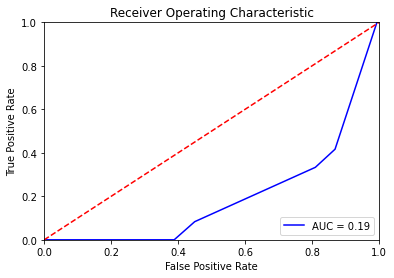

In [1613]:
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our QuadraticDiscriminantAnalysis is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion

. A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

. The model fits a Gaussian density to each class.

. all Metrics values was under 30%

. QDA assumes that each class follow a Gaussian distribution, but with the values of metrics we can say that we didn't have a Gaussien distrubtion of data (unbalanced data).

. the ROC plot with a AUc line under the red line,

## VotingClassifier

Using RandomForestClassifier and Quadratic Discriminant Analysis

In [1635]:
data3 = data[data.rating != 10]
x = data3.drop(['rating','scoring'], axis =1)
y = data3['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [1636]:
# second estimator for VotingClassifier  
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
y_val_pred = rf1.predict_proba(x_test)
acc_rf1 = rf1.score(x_test, y_test)
acc_lr = rf1.score(x_test, y_test)

print('The accuracy of the Random Forest Classifier is:', acc_lr * 100, '%')

The accuracy of the Random Forest Classifier is: 50.46097111247695 %


In [1639]:
eclf = VotingClassifier(estimators=[('clf', clf), ('rf1', rf1)], voting="soft")
eclf.fit(x_train, y_train)

y_pred = eclf.predict(x_test)
acc_rf1 = eclf.score(x_test, y_test)
acc_rf1


0.421020282728949

In [1640]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the VotingClassifier is: {f1_score(y_test, y_pred, average='macro')}")



F1 Score of the VotingClassifier is: 0.2883811088171936


In [1641]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the VotingClassifier is: {recall_score(y_test, y_pred,average='macro')}")



Recall Score of the VotingClassifier is: 0.2797897561211148


In [1642]:
from sklearn.metrics import precision_score
# Calculating the precision_score of classifier
print(f"precision_score of the VotingClassifier is: {precision_score(y_test, y_pred,average='macro')}")

precision_score of the VotingClassifier is: 0.33896788983018256


AUC for our VotingClassifier is: 0.09907120743034056


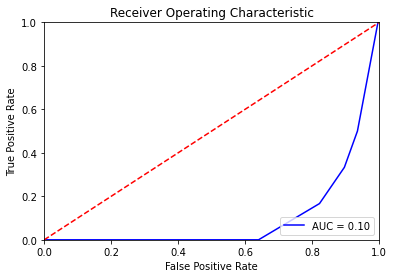

In [1643]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our VotingClassifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DecisionTreeClassifier

In [1655]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import tree

In [1656]:
data3 = data[data.rating != 10]
x = data3.drop(['rating','scoring'], axis =1)
y = data3['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(8134, 11)
(8134,)


In [1657]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) # to emulate the split of my data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6507, 11)
(6507,)
(1627, 11)
(1627,)


In [1658]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

rfc = DecisionTreeClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the  Classifier is:', acc_rfc * 100, '%')

The accuracy of the  Classifier is: 42.28641671788568 %


In [1659]:
from scipy.stats import randint
 
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 10, 100, None],
              "max_features": randint(1, 11),
              "min_samples_leaf": randint(1, 11),
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(x,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 8}
Best score is 0.44467658690108725


In [1660]:
tree_model = DecisionTreeClassifier()

In [1661]:
# model that compute the tree algorithm

tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 10, min_samples_leaf= 9)
tree_model.fit(x_train,y_train)

# prediction
y_predict=tree_model.predict(x_test)  

print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(y_predict,y_test)))

The accuracy of the Decision Tree is 0.428


In [1662]:
tree_model.feature_importances_

array([0.07871724, 0.10959525, 0.09445506, 0.21843875, 0.06441684,
       0.1229357 , 0.04349571, 0.05094051, 0.07850669, 0.0742831 ,
       0.06421516])

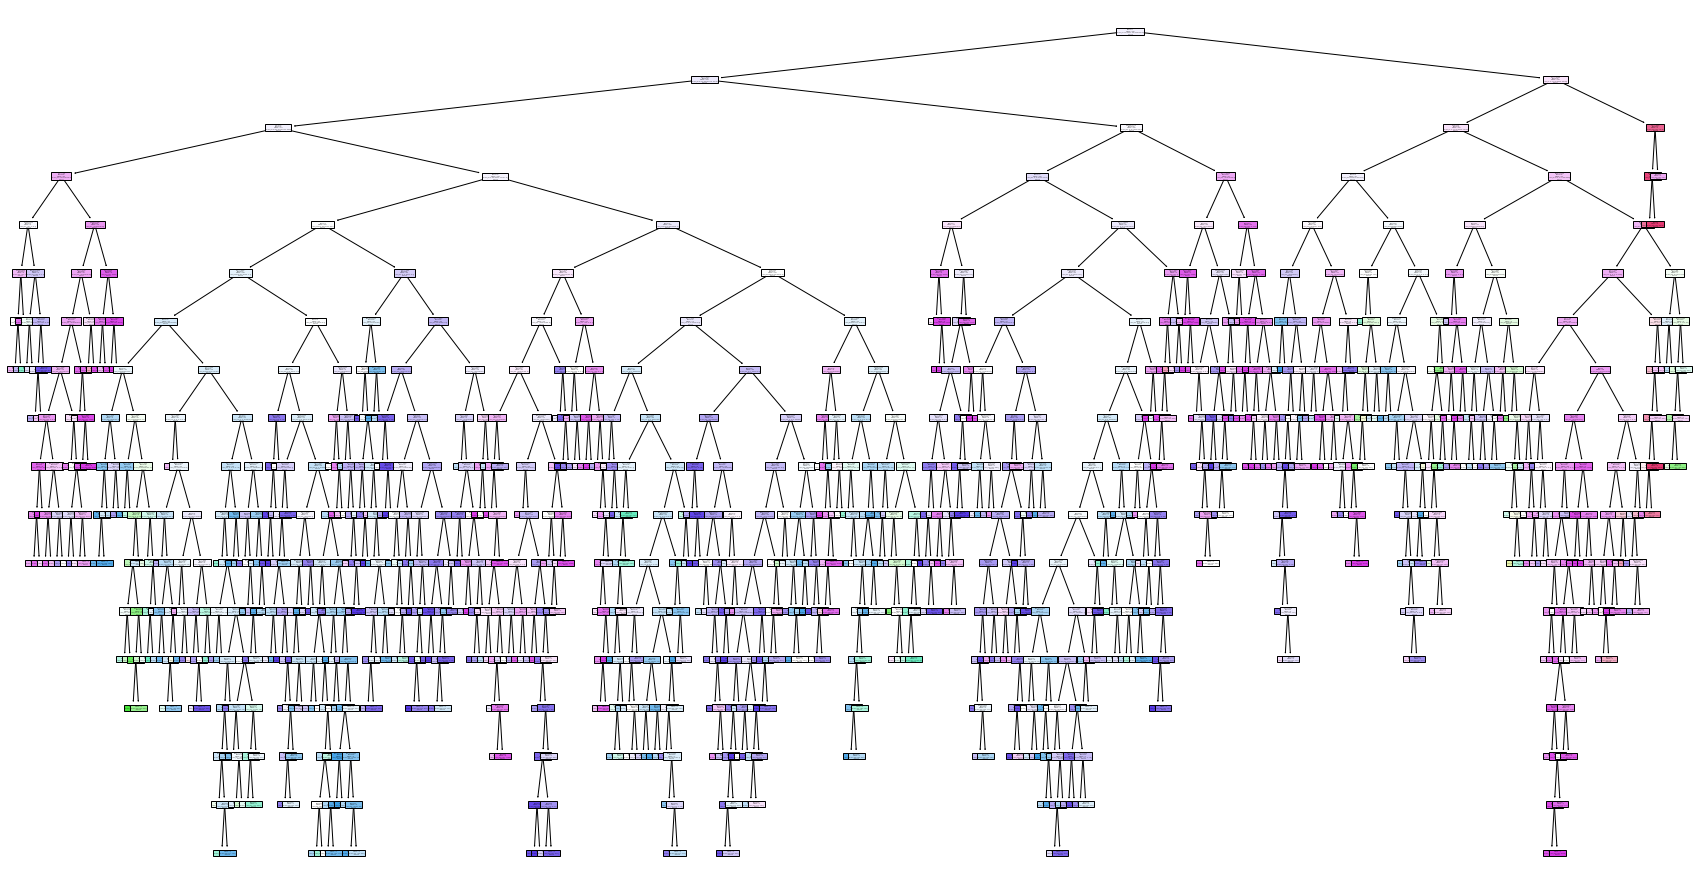

In [1663]:
plt.figure(figsize = (30,16))
fn = x.columns
cn = ['1','2','3', '4', '5', '6','7','8','9','10']
plot_tree(tree_model, feature_names = fn, class_names = cn, filled = True);

In [1664]:
print(f"F1 Score of the DecisionTreeClassifier is: {f1_score(y_test, y_predict, average='macro') *100}")

F1 Score of the DecisionTreeClassifier is: 30.800915513353516


In [1665]:
print(f"Recall Score of the DecisionTreeClassifier is: {recall_score(y_test, y_predict ,average='macro')*100}")

Recall Score of the DecisionTreeClassifier is: 29.48867694736512


AUC for our DecisionTreeClassifier is: 0.30431565967940816


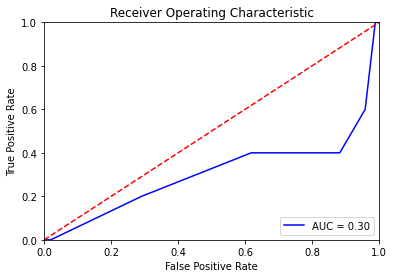

In [1666]:
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our DecisionTreeClassifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[  1   2   2   0   0   0   0   0]
 [  3   0   6   5   3   2   1   0]
 [  2   9  22  13  14   9   4   1]
 [  1   4  20  28  45  23  11   1]
 [  2   6  18  51 153 125  56   3]
 [  2   5  11  36 123 228  96   7]
 [  0   0   3   8  46 104 233  19]
 [  0   1   0   2   4   9  21  23]]


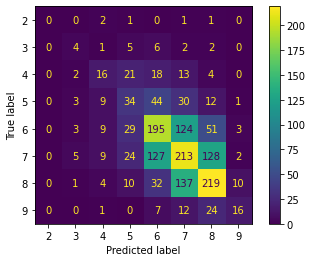

In [1667]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# confusion_matrix contains the summary of the predictions
print(confusion_matrix(y_test, y_pred))

# plotting the confusion_matrix
plot_confusion_matrix(tree_model, x_test,y_test)
plt.show()

Summary of the DecisionTree Classifier Model
. Decision tree is a supervised learning algorithm that can be used for regression and classification problems. 
  The algorithm uses training data to create rules that can be represented by a tree structure.
. Like any other tree representation, it has a root node, internal nodes, and leaf nodes. 
  The internal node represents condition on attributes, the branches represent the results of the condition 
  and the leaf node represents the class label.
. Decision tree can work with both categorical and numerical data.This is in contrast with other ML algorithms 
  that cannot work with categorical data and requires encoding to numeric values.

Advantages of Decision Tree
. The decision tree is a white-box model. We can easily understand any particular condition of the model 
  which results in either true or false.
. It can handle both continuous and categorical data.

Disadvantages of Decision Tree
. Decision trees may become very large and complex with a large number of attributes (like in our case depth 10)
. A decision tree at times can be sensitive to the training data, a very small variation in data can lead to a 
  completely different tree structure.

. all Metrics values was under 45%

. The ROC plot with a AUc line is under the red line